## Sonar Rock and Mine Prediction 🌊🪙

### Introduction 🚀

Welcome to the Sonar Rock and Mine Prediction project! In this notebook, I will explore the classification of sonar signals to predict whether the object detected is a rock or a mine. The dataset used for this project contains sonar signals reflected by underwater objects, and my goal is to build a predictive model.

<img src="sonar-rock.jpg" height="30px;" width="300px" style="float:left;" />

### Dataset Overview 📊

The dataset consists of the following features:
- **Feature1, Feature2, ..., Feature60:** Numerical values representing the strength of the sonar signal at different frequencies.
- **Target:** Binary classification - 'R' for Rock and 'M' for Mine.

### Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Data Collection & Analysis

In [2]:
dataset = pd.read_csv('sonar.all-data.csv',header=None)

In [3]:
dataset.head(4)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [4]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
print("M -> Mine\nR -> Rock")
dataset[60].value_counts()

M -> Mine
R -> Rock


M    111
R     97
Name: 60, dtype: int64

In [7]:
dataset.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [8]:
# I can observe that, almost all data belongs to 'M'(Mine) having greater values than 'R'(Rock).

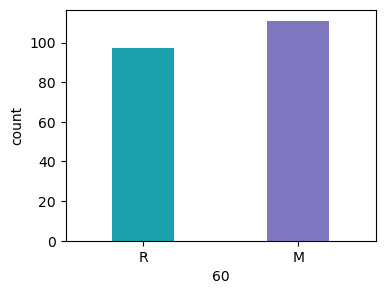

In [9]:
plt.figure(figsize=(4,3))
# custom_palette = {'R: 'blue', M: 'green'}
sns.countplot(data=dataset,x=60,width=0.4,palette=['#00b7c7',"#776bcd"])
plt.show()

### Label Encoding

In [10]:
encoder = LabelEncoder()

In [11]:
dataset[60] = encoder.fit_transform(dataset[60])

In [12]:
print("0 -> Mine\n1 -> Rock")
dataset[60].value_counts()

0 -> Mine
1 -> Rock


0    111
1     97
Name: 60, dtype: int64

### Spliting of training & testing/validation data

In [13]:
X = dataset.drop(60,axis='columns').values
y = dataset[60].values

In [14]:
X[:1]

array([[0.02  , 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601,
        0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.066 , 0.2273,
        0.31  , 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.555 ,
        0.6711, 0.6415, 0.7104, 0.808 , 0.6791, 0.3857, 0.1307, 0.2604,
        0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744,
        0.051 , 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343,
        0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167,
        0.018 , 0.0084, 0.009 , 0.0032]])

In [15]:
y[:5]

array([1, 1, 1, 1, 1])

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=62)

In [17]:
print(X_train.shape,X_test.shape)

(166, 60) (42, 60)


### Cross Validation & Hyperparameter Tuning

In [18]:
gridcv1 = GridSearchCV(LogisticRegression(),param_grid={'C':[1,3,5,7,10,13]},cv=5,return_train_score=False)
gridcv1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 3, 5, 7, 10, 13]})

In [19]:
# knn_score = {}
# for i,k in enumerate(np.arange(1,11)):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#     knn_score[i] = scores.mean()

gridcv2 = GridSearchCV(KNeighborsClassifier(),param_grid={'n_neighbors':[x for x in range(1,10)]},cv=5,return_train_score=False)
gridcv2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [20]:
print("Logistic Regression",gridcv1.best_score_,gridcv1.best_params_,sep="\n",end='\n\n')
print("Knn",gridcv2.best_score_,gridcv2.best_params_,sep="\n")

Logistic Regression
0.7404634581105171
{'C': 3}

Knn
0.8012477718360073
{'n_neighbors': 3}


In [21]:
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

In [22]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [23]:
model.score(X_train,y_train)

0.8734939759036144

In [24]:
model.score(X_test,y_test)

0.8333333333333334

In [25]:
y_pred = model.predict(X_test)

### Metrics Evaluation

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.95      0.75      0.84        24

    accuracy                           0.83        42
   macro avg       0.84      0.85      0.83        42
weighted avg       0.86      0.83      0.83        42



In [27]:
matrix = confusion_matrix(y_test,y_pred)

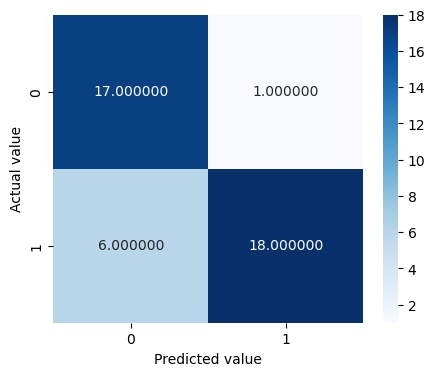

In [28]:
plt.figure(figsize=(5,4))
sns.heatmap(matrix,annot=True,fmt='2,f',cmap='Blues')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

### Predictive System

In [29]:
input_data = [0.0125, 0.0152, 0.0218, 0.0175, 0.0362, 0.0696, 0.0873, 0.0616,
        0.1252, 0.1302, 0.0888, 0.05  , 0.0628, 0.1274, 0.0801, 0.0742,
        0.2048, 0.295 , 0.3193, 0.4567, 0.5959, 0.7101, 0.8225, 0.8425,
        0.9065, 0.9802, 1.    , 0.8752, 0.7583, 0.6616, 0.5786, 0.5128,
        0.4776, 0.4994, 0.5197, 0.5071, 0.4577, 0.3505, 0.1845, 0.189 ,
        0.1967, 0.1041, 0.055 , 0.0492, 0.0622, 0.0505, 0.0247, 0.0219,
        0.0102, 0.0047, 0.0019, 0.0041, 0.0074, 0.003 , 0.005 , 0.0048,
        0.0017, 0.0041, 0.0086, 0.0058]

In [30]:
prediction = model.predict([input_data])   # for prediction - requires 2D array, if it is 1D, then reshape it

In [31]:
if prediction[0] == 0:
    print("Mine")
else:
    print('Rock')

Rock


### Dumping model

In [32]:
import joblib as jb

In [33]:
jb.dump(model,'sonar_prediction.jb')

['sonar_prediction.jb']